## Guided Project: Predicting Heart Disease
##### We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before. We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future.

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
#read the data into a pandas dataframe.
data = pd.read_csv('heart_disease_prediction - heart_disease_prediction.csv')

In [4]:
#Display the first five rows of the dataframe.
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
#Print out the number of features and observations in the dataset.
data.shape

(918, 12)

In [6]:
# Print data types and null counts for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Count the number of nulls.
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
#Describe the data
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


There are no missing values in the data.
The average age of the patients is 54, the younger is 28, and the older is 77.
The median for Cholesterol is higher than its mean by roughly 25 mm/dl.
RestingBP and Cholesterol have a minimum value of zero, a 0 value for serum cholesterol and for restingBP is unlikely.
55% of the patients have heart disease.

In [9]:
categorical_columns = ["ST_Slope","ExerciseAngina","FastingBS","RestingECG","Sex","ChestPainType","HeartDisease"]

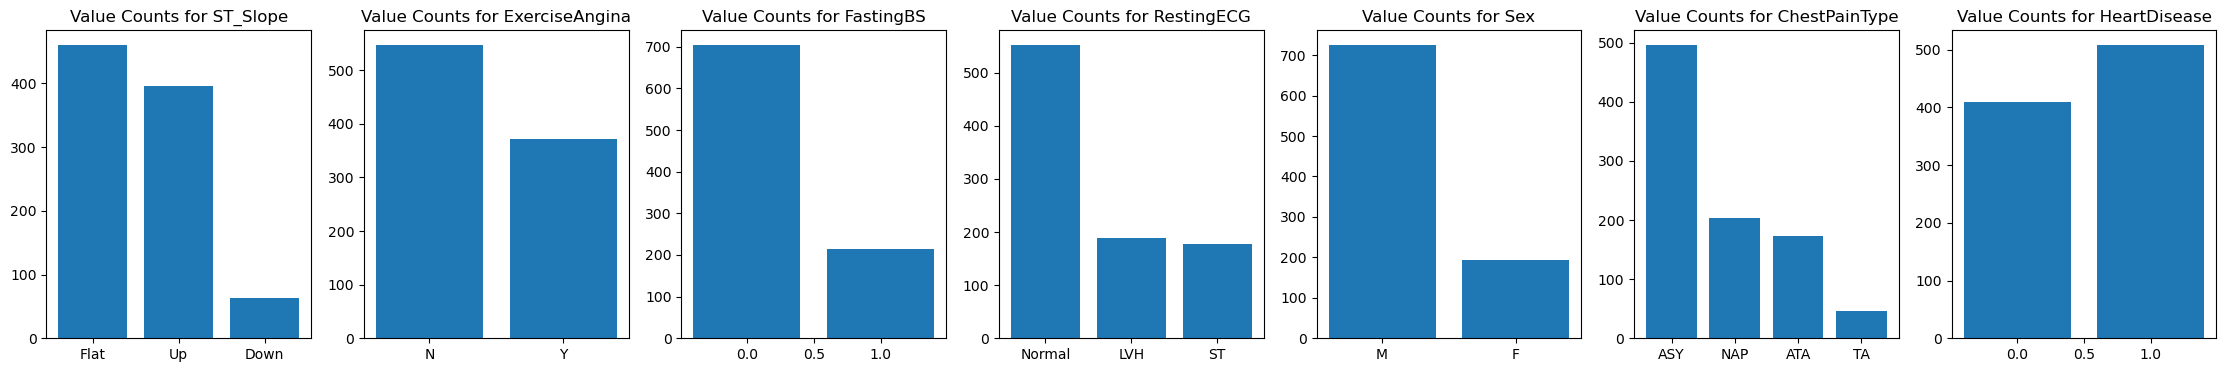

In [10]:
# Plot the value count of the categorical columns.
num_plots = len(categorical_columns)
num_rows = 1
num_cols = num_plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(4*num_cols, 4))
for i, col in enumerate(categorical_columns):
    if num_plots > 1:
        ax = axes[i]
    else:
        ax = axes
    value_counts = data[col].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(f'Value Counts for {col}')
plt.show()

From the plots we can see that:
The dataset is highly skewed towards male patients. 725 rows correspond to male patients, whereas only 193 correspond to female patients. This could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.
410 patients were not diagnosed with heart disease, whereas 508 patients were. The target variable is somewhat evenly distributed, which is beneficial for training our model.

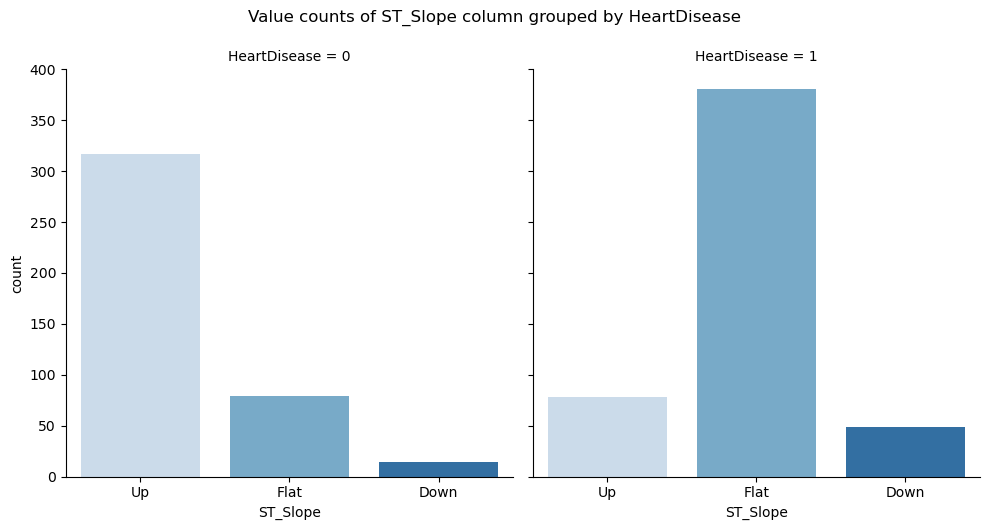

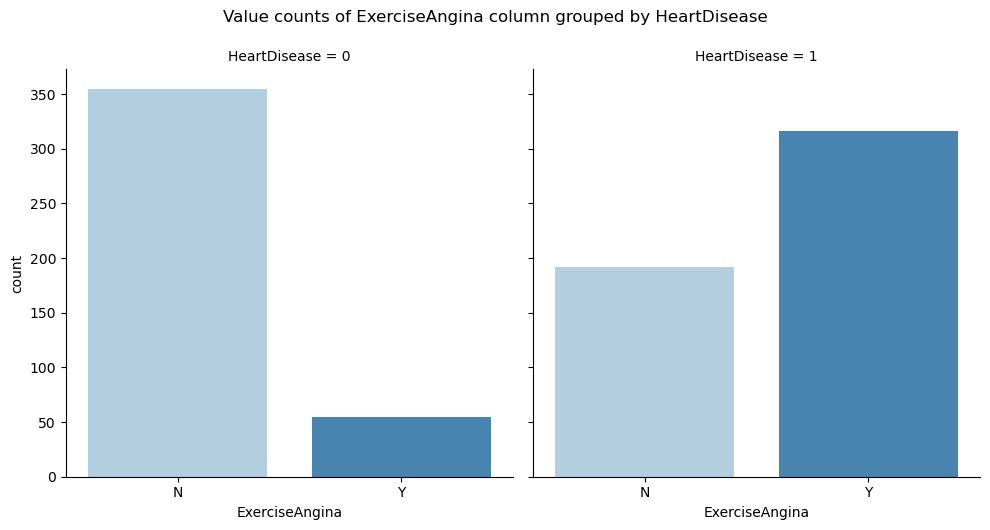

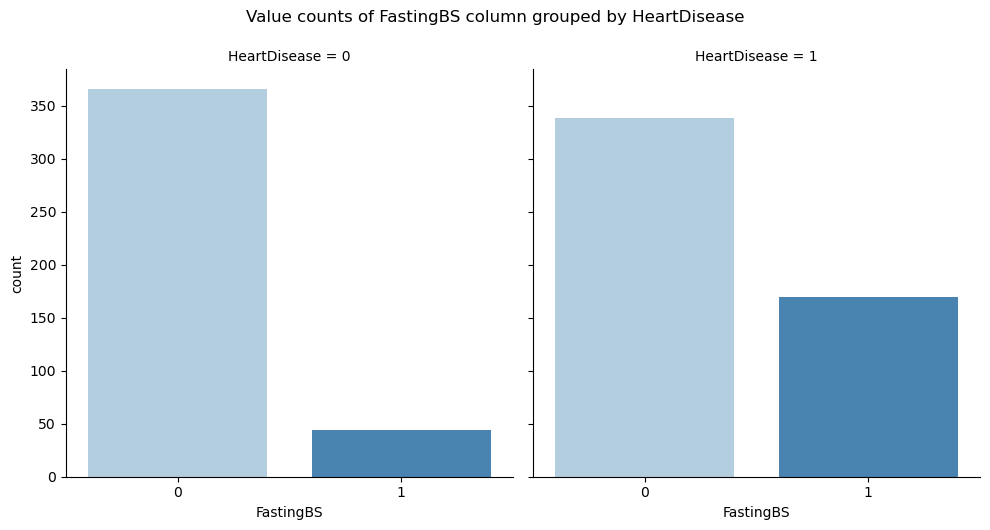

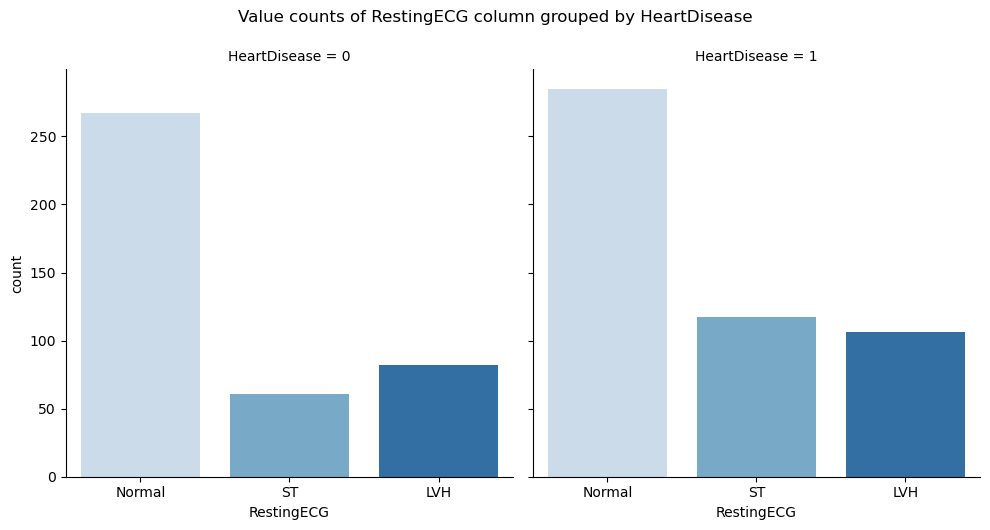

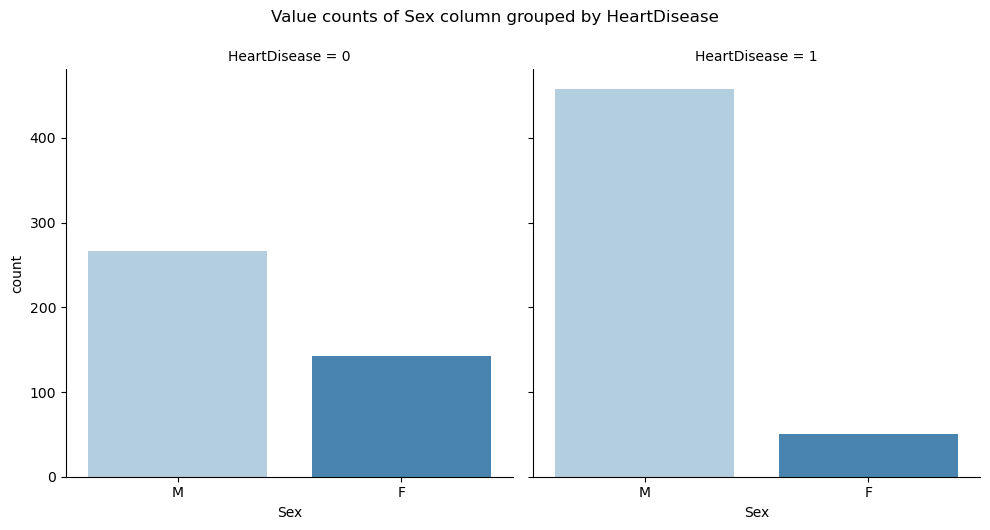

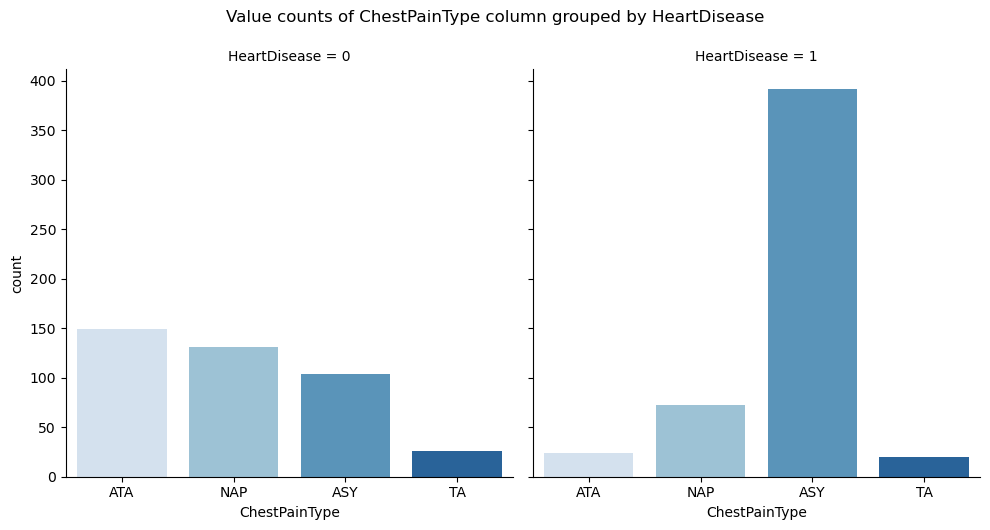

In [11]:
# # Plot the value count of the categorical columns grouped by the target.

for col in categorical_columns[:-1]:
    sns.catplot(data=data, x=col, kind='count',palette='Blues', col = categorical_columns[-1])
    plt.suptitle("Value counts of "+col+" column grouped by HeartDisease", y=1.05)
plt.show()

From the plots we can see that:
A significant number of patients, 392, diagnosed with heart disease have asymptomatic (ASY) chest pain. While chest pain could be a relevant feature for our model, it's should be noted that asymptomatic implies that those patients who had heart disease did not have chest pain as a symptom.
A high number (170) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not.

In [12]:
#Count the number of rows that have a 0 value for RestingBP and for Cholesterol.
val_counts = data['Cholesterol'].value_counts()
print(val_counts[val_counts.index == 0])
val_counts1 = data['RestingBP'].value_counts()
print(val_counts1[val_counts1.index == 0])

0    172
Name: Cholesterol, dtype: int64
0    1
Name: RestingBP, dtype: int64


In [13]:
#Clean the rows that have a 0 value for RestingBP and for Cholesterol.
data = data[data['RestingBP'] != 0]

In [14]:
# Replace the 0 values in the Cholesterol column with the median value.
median_value = data['Cholesterol'].median()
data.loc[data['Cholesterol'] == 0, 'Cholesterol'] = median_value


In [15]:
# Convert the categorical features into dummy variables.
dummies_data = pd.get_dummies(data, columns=['Sex', 'ExerciseAngina', 'ChestPainType','RestingECG','ST_Slope'], drop_first=True)


In [16]:
#Print the correlation of all the columns.
correlation = dummies_data.corr()
correlation['HeartDisease']

Age                  0.282012
RestingBP            0.117990
Cholesterol          0.043329
FastingBS            0.267994
MaxHR               -0.401410
Oldpeak              0.403638
HeartDisease         1.000000
Sex_M                0.305118
ExerciseAngina_Y     0.495490
ChestPainType_ATA   -0.401680
ChestPainType_NAP   -0.215311
ChestPainType_TA    -0.054591
RestingECG_Normal   -0.092452
RestingECG_ST        0.103067
ST_Slope_Flat        0.553700
ST_Slope_Up         -0.621843
Name: HeartDisease, dtype: float64

<AxesSubplot:>

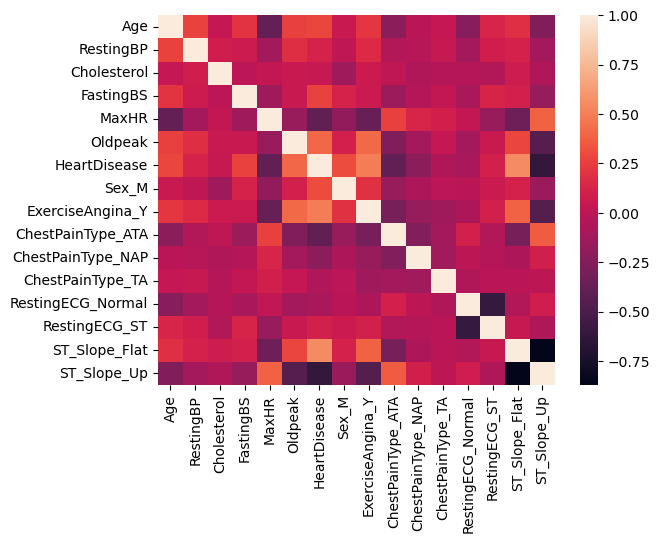

In [17]:
#Create heatmap
sns.heatmap(correlation)

In [18]:
#Drop uncorrelated columns.
corr_data = dummies_data.drop(['RestingECG_ST', 'RestingECG_Normal','ChestPainType_TA','ChestPainType_NAP','Cholesterol','RestingBP','FastingBS'], axis = 1)

In [19]:
#Normalize the data, and save it back to the df.
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
normalize_cols = mms.fit_transform(corr_data[['MaxHR', 'Age', 'Oldpeak']])
corr_data[['MaxHR', 'Age', 'Oldpeak']] = normalize_cols

In [21]:
# Split the data into features and labels.
X = corr_data.drop('HeartDisease', axis = 1)
y = corr_data['HeartDisease']

In [22]:
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [23]:
#  Instantiate a KNN model.
knn = KNeighborsClassifier()

In [24]:
# Create a dictionary of parameters, instantiate the grid search and fit on training set.
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(3, 20, 2), 'weights':['uniform', 'distance']}
clf=GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
print(f"Training best parameters: {clf.best_params_}")
print(f"Training best score; {clf.best_score_}")

Training best parameters: {'n_neighbors': 19, 'weights': 'uniform'}
Training best score; 0.8498014888337468


In [25]:
# Run model on test set and return score.
test_knn = clf.best_estimator_
test_pred=test_knn.predict(X_test)
test_accuracy=accuracy_score(test_pred, y_test)
print(test_accuracy)

0.8333333333333334
